In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [4]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
X_train.shape

(11610, 8)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

In [12]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 3.3697 - mae: 1.4280 - val_loss: 0.7126 - val_mae: 0.6368
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6964 - mae: 0.6267 - val_loss: 0.6880 - val_mae: 0.5704
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - mae: 0.5701 - val_loss: 0.5803 - val_mae: 0.5352
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - mae: 0.5491 - val_loss: 0.5166 - val_mae: 0.5207
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - mae: 0.5292 - val_loss: 0.4895 - val_mae: 0.5022
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - mae: 0.5146 - val_loss: 0.4951 - val_mae: 0.4934
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - mae: 0.5060 - val_loss: 0.4861 - val_mae: 0.4838
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [13]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 839us/step - loss: 0.3942 - mae: 0.4502


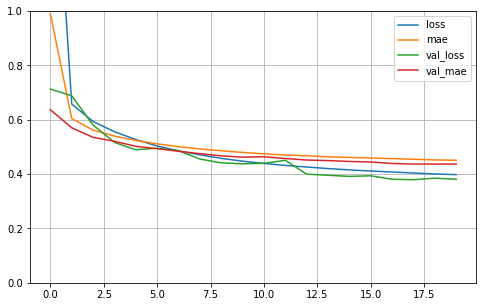

In [14]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred)
print(y_test[:3])

[[0.5328767]
 [1.8915398]
 [3.4040875]]
[0.477   0.458   5.00001]


In [16]:
# deleting model now

In [41]:
del model

In [42]:
keras.backend.clear_session()

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)

In [45]:
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [46]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]                

In [47]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["mae"])

In [48]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
363/363 [==============================] - 1s 2ms/step - loss: 1.9731 - mae: 1.0344 - val_loss: 3.3940 - val_mae: 0.6266
Epoch 2/40
363/363 [==============================] - 1s 1ms/step - loss: 0.7638 - mae: 0.5991 - val_loss: 0.9360 - val_mae: 0.5652
Epoch 3/40
363/363 [==============================] - 0s 1ms/step - loss: 0.6045 - mae: 0.5599 - val_loss: 0.5649 - val_mae: 0.5328
Epoch 4/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5862 - mae: 0.5501 - val_loss: 0.5712 - val_mae: 0.5239
Epoch 5/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5452 - mae: 0.5330 - val_loss: 0.5045 - val_mae: 0.5068
Epoch 6/40
363/363 [==============================] - 1s 2ms/step - loss: 0.5243 - mae: 0.5229 - val_loss: 0.4831 - val_mae: 0.4966
Epoch 7/40
363/363 [==============================] - 0s 1ms/step - loss: 0.5185 - mae: 0.5156 - val_loss: 0.4639 - val_mae: 0.4890
Epoch 8/40
363/363 [==============================] - 0s 1ms/step - loss: 0.

In [49]:
mae_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 909us/step - loss: 0.3663 - mae: 0.4284


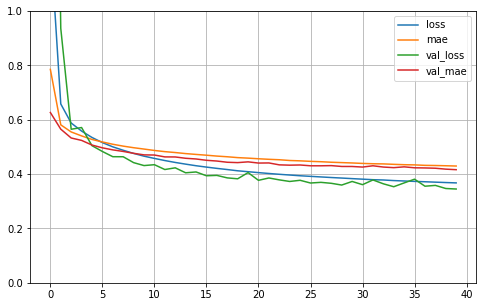

In [51]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [52]:
# saving the model
model.save("ann_regression_wide_deep.h5")